In [26]:
'''
This script is used to genereate noise files from laser data for the DGA_simulator.
'''

%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import sys
import pandas as pd
import os

sys.path.append(r'C:\Data\Python\Characterisation_Report_scripts\src\analysis')
import functions
import puls_to_puls_noise

plt.style.use(r"C:\Data\Python\Characterisation_Report_scripts\src\beamer_style.mplstyle")

In [27]:
class noise():
    '''
    This class generates noise files from laser data. 
    example use:
    noise(input file_path, ouput file_path,4,0)
    '''
    def __init__(self,puls_to_puls_noise_instance_file,output_file,D1_index=0,D2_index=0):
        '''
        loads data, generates linehsapes and saves it a pickle file. 
        @param puls_to_puls_noise_instance_file: path to the laser data file.
        @param output_file: file path to the ouput file. (must be .pck for import in DGA_simulator)
        @param D1_index: first measurement index
        @param D2_index: sencond measurement index
        '''
        self.load_file(puls_to_puls_noise_instance_file)
        self.get_noise_distribution(D1_index,D2_index)
        self.save_file(output_file)
        
        
    
    def load_file(self,file_name):
        '''
        loads data 
        
        @param file_name: Path of the input file. 
        '''
        self.noise_instance=puls_to_puls_noise.puls_to_puls_noise(file_name,measurement_index=-1)
    
    def get_noise_distribution(self,D1_index,D2_index):
        '''
    
        normalises the noise distribution and saves it in self.data_frame
        '''
        noise=self.noise_instance.data.measurement_dict_list[-1][D2_index]["intensities_nave"][D1_index].compressed()
        noise/=noise.mean()
        self.data_frame=pd.DataFrame({'noise':noise})

    def save_file(self,file_name):
        '''
        saves the tuning as a pandas Dataframe pickle.
        @param file_name: path to the ouput file
        '''
        self.data_frame.to_pickle(file_name)
    
    def plot_noise(self):
        '''
        plots a histogram of the pulse powers noise together with the kernel density enstimation.
        '''
        data=self.data_frame['noise'].values
        #kernel density estimation
        x_array=np.linspace(data.min(),data.max(),200)
        kde=scipy.stats.gaussian_kde(data)
        pdf=kde.pdf(x_array)
        
        fig, ax=plt.subplots(1)
        binwidth=0.002
        bins=np.arange(min(data), max(data) + binwidth, binwidth)
        n,bins,patches=ax.hist(data, bins,log=False,alpha=0.5,normed=True)
        ax.plot(x_array,pdf,color='r')
        ax.set_xlabel('Intensity')
        ax.set_ylabel('Frequency')
        plt.show()
        

In [28]:
ls=noise(r"C:\Data\Results\Auto_measurements\PN-12-024-SN0001\puls_to_puls_noise.txt",r"C:\Data\Python\DGA_simulator\sample_laser_files\PN-12-024-SN0001_noise.pck",4,0)

In [24]:
ls.get_noise_distribution(5,0)

<IPython.core.display.Javascript object>


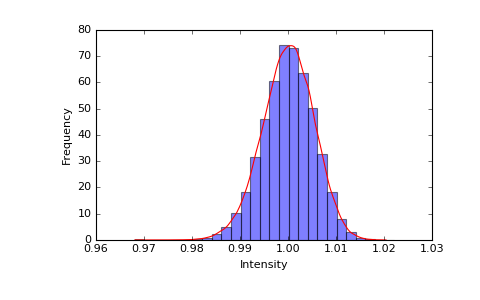

In [29]:
ls.plot_noise()

In [2]:
a=dict({'a':10})

In [3]:
a

{'a': 10}

In [4]:
if 'a' in a:
    print 'a'

a
